In [ ]:
# Basic structure for Beautifulsoup
import requests
from bs4 import BeautifulSoup
data = []
url = 'https://www.cdc.go.kr/board/board.es?mid=&bid=0030&tag=&act=view&list_no=366678'
while requests.get(url):
# with requests.get(url) as u:    
    u = requests.get(url)
    soup = BeautifulSoup(u.content) #<----------------- Making the soup
    
#     print(soup.prettify())    # Prettify prints the page html with appropriate indents
    table = soup.find('table')
    table_body = table.find('tbody')

    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        print("cols : ", cols)
        if 'As' in cols[0]:
            print("As in col : ", cols)
        data.append([ele for ele in cols])

    urls = []
    for a in soup.find_all('a', href=True):
        if 'board' in a['href']:
            print("Found the URL:", a['href'])
            urls.append(a['href'])
    url = 'https://www.cdc.go.kr/'+urls[-1]

cols :  ['Period\n(since 3 Jan)', 'Total', 'Tested positive', 'Being tested', 'Tested negative']
cols :  ['Confirmed', 'Discharged', 'Isolated', 'Deceased']
cols :  ['As of 0:00\n28 March (Sat)', '387,925', '9,478', '4,811', '4,523', '144', '16,564', '361,883']
As in col :  ['As of 0:00\n28 March (Sat)', '387,925', '9,478', '4,811', '4,523', '144', '16,564', '361,883']
cols :  ['As of 0:00\n29 March (Sun)', '394,141', '9,583', '5,033', '4,398', '152', '15,028', '369,530']
As in col :  ['As of 0:00\n29 March (Sun)', '394,141', '9,583', '5,033', '4,398', '152', '15,028', '369,530']
cols :  ['Difference', '6,216', '105', '222', '-125', '8', '-1,536', '7,647']
Found the URL: /board/board.es?mid=&bid=0030&tag=&act=view&list_no=366681
Found the URL: /board/board.es?mid=&bid=0030&tag=&act=view&list_no=366676
cols :  ['Period\n(since 3 Jan)', 'Total', 'Tested positive (PCR)', 'Being tested', 'Tested negative']
cols :  ['Confirmed', 'Discharged', 'Isolated', 'Deceased']
cols :  ['As of 0:00\n28

cols :  ['Period\n(since 3 Jan)', 'Total', 'Tested positive', 'Being tested', 'Tested negative']
cols :  ['Confirmed', 'Discharged', 'Isolated', 'Deceased']
cols :  ['As of 0:00 \n23 March (Mon)', '338,036', '8,961', '3,166', '5,684', '111', '13,628', '315,447']
As in col :  ['As of 0:00 \n23 March (Mon)', '338,036', '8,961', '3,166', '5,684', '111', '13,628', '315,447']
cols :  ['As of 0:00\n24 March (Tues)', '348,582', '9,037', '3,507', '5,410', '120', '15,440', '324,105']
As in col :  ['As of 0:00\n24 March (Tues)', '348,582', '9,037', '3,507', '5,410', '120', '15,440', '324,105']
cols :  ['Difference', '+10,546', '+76', '+341', '-274', '+9', '+1,812', '+8,658']
Found the URL: /board/board.es?mid=&bid=0030&tag=&act=view&list_no=366633
Found the URL: /board/board.es?mid=&bid=0030&tag=&act=view&list_no=366627
cols :  ['Period\n(since 3 Jan)', 'Total', 'Tested positive', 'Being tested', 'Tested negative']
cols :  ['Confirmed', 'Discharged', 'Isolated', 'Deceased']
cols :  ['As of 0:00 

In [ ]:
for d in data:
    print(d)

In [92]:
result = list()

for d in data:
    if len(d)>3:
        if 'As' in d[0]:
            result.append(d)

In [93]:
result

[['As of 0:00\n28 March (Sat)',
  '387,925',
  '9,478',
  '4,811',
  '4,523',
  '144',
  '16,564',
  '361,883'],
 ['As of 0:00\n29 March (Sun)',
  '394,141',
  '9,583',
  '5,033',
  '4,398',
  '152',
  '15,028',
  '369,530'],
 ['As of 0:00\n28 March (Sat)',
  '387,925',
  '9,478',
  '4,811',
  '4,523',
  '144',
  '16,564',
  '361,883'],
 ['As of 0:00\n29 March (Sun)',
  '394,141',
  '9,583',
  '5,033',
  '4,398',
  '152',
  '15,028',
  '369,530'],
 ['As of 0:00 \n27 March (Fri.)',
  '376,961',
  '9,332',
  '4,528',
  '4,665',
  '139',
  '15,219',
  '352,410'],
 ['As of 0:00\n28 March (Sat.)',
  '387,925',
  '9,478',
  '4,811',
  '4,523',
  '144',
  '16,564',
  '361,883'],
 ['As of 0:00 \n27 March (Fri.)',
  '376,961',
  '9,332',
  '4,528',
  '4,665',
  '139',
  '15,219',
  '352,410'],
 ['As of 0:00\n28 March (Sat.)',
  '387,925',
  '9,478',
  '4,811',
  '4,523',
  '144',
  '16,564',
  '361,883'],
 ['As of 0:00\n26 March (Thurs)',
  '364,942',
  '9,241',
  '4,144',
  '4,966',
  '131',
 

In [141]:
val_dic = dict()
for li in result:
    time = int(li[0].split(":")[0].split(" ")[-1])
#     print(time)
    if 'As' in li[0] and time < 12:
        if '\n' in li[0]:
            split_char = '\n'
        elif ',' in li[0]:
            split_char = ','
        else:
            split_char = ' '
        date = li[0].split(split_char)[1]
        if 'of' in date:
            continue
        day = date.split()[:2]
        day[1] = day[1][:3]
        if '.' in day[0]:
            day[0] = day[0][:-1]
        key = ''.join(day)
        if '*' in li[2:3][0]: continue
        if len(li[1:])<7:
            val = int(li[2:3][0].replace(',' , ''))+int(li[3:4][0].replace(',' , ''))
            val_dic[key] = (int(li[1:2][0].replace(',' , '')), val)
        else:
            val_dic[key] = (int(li[1:2][0].replace(',' , '')), int(li[2:3][0].replace(',' , '')))
        print("key : ", key, "    ",li)
print(val_dic)
a = sorted(val_dic.items(), key=lambda x: x[1])    

dict_a = dict(a)


key :  28Mar      ['As of 0:00\n28 March (Sat)', '387,925', '9,478', '4,811', '4,523', '144', '16,564', '361,883']
key :  29Mar      ['As of 0:00\n29 March (Sun)', '394,141', '9,583', '5,033', '4,398', '152', '15,028', '369,530']
key :  28Mar      ['As of 0:00\n28 March (Sat)', '387,925', '9,478', '4,811', '4,523', '144', '16,564', '361,883']
key :  29Mar      ['As of 0:00\n29 March (Sun)', '394,141', '9,583', '5,033', '4,398', '152', '15,028', '369,530']
key :  27Mar      ['As of 0:00 \n27 March (Fri.)', '376,961', '9,332', '4,528', '4,665', '139', '15,219', '352,410']
key :  28Mar      ['As of 0:00\n28 March (Sat.)', '387,925', '9,478', '4,811', '4,523', '144', '16,564', '361,883']
key :  27Mar      ['As of 0:00 \n27 March (Fri.)', '376,961', '9,332', '4,528', '4,665', '139', '15,219', '352,410']
key :  28Mar      ['As of 0:00\n28 March (Sat.)', '387,925', '9,478', '4,811', '4,523', '144', '16,564', '361,883']
key :  26Mar      ['As of 0:00\n26 March (Thurs)', '364,942', '9,241', '4,

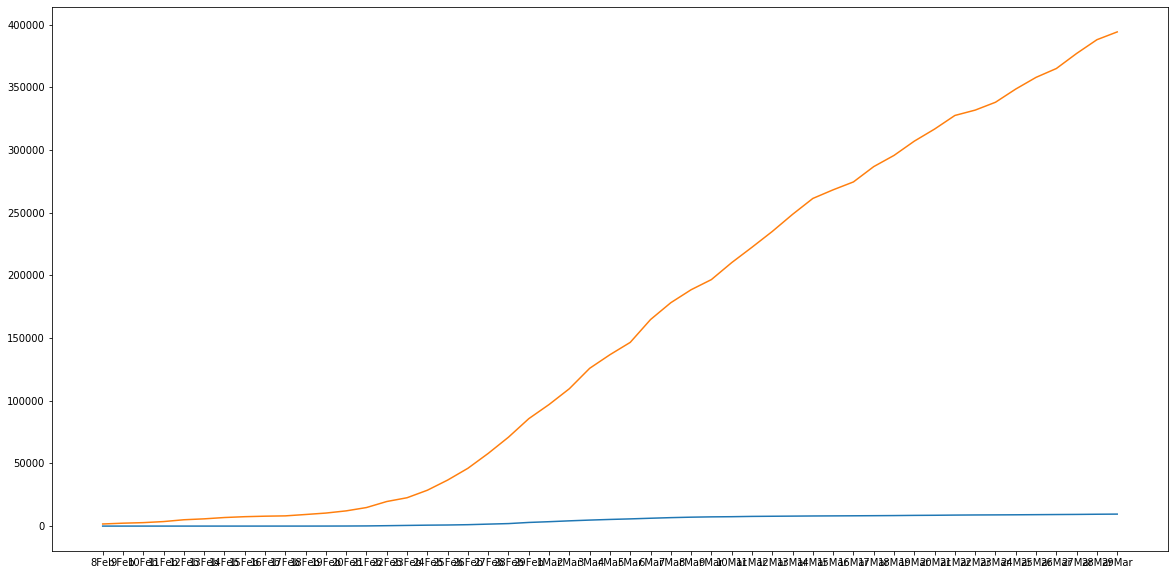

In [169]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
vals = list(dict_a.values())
n_test = list() 
n_confirmed = list()
for val in vals:
    n_test.append(val[1])
    n_confirmed.append(val[0])
plt.plot(list(dict_a.keys()),n_test)
plt.plot(list(dict_a.keys()),n_confirmed)
# plt.yscale()

In [170]:
vals[13:]

[(14816, 156),
 (19621, 346),
 (22633, 556),
 (28615, 763),
 (36716, 893),
 (46127, 1146),
 (57990, 1595),
 (70940, 2022),
 (85693, 2931),
 (96985, 3526),
 (109591, 4212),
 (125851, 4812),
 (136707, 5328),
 (146541, 5766),
 (164740, 6284),
 (178189, 6767),
 (188518, 7134),
 (196618, 7382),
 (210144, 7513),
 (222395, 7755),
 (234998, 7869),
 (248647, 7979),
 (261335, 8086),
 (268212, 8162),
 (274504, 8236),
 (286716, 8320),
 (295647, 8413),
 (307024, 8565),
 (316664, 8652),
 (327509, 8799),
 (331780, 8897),
 (338036, 8961),
 (348582, 9037),
 (357896, 9137),
 (364942, 9241),
 (376961, 9332),
 (387925, 9478),
 (394141, 9583)]

In [244]:
S_KOREA_POP = 51844627
print(n_test[13:])
print(n_confirmed[13:])
S_KOR_df = pd.DataFrame(list(zip(n_test[13:], n_confirmed[13:])), columns =['n_test', 'n_confirmed'])     
S_KOR_df

[156, 346, 556, 763, 893, 1146, 1595, 2022, 2931, 3526, 4212, 4812, 5328, 5766, 6284, 6767, 7134, 7382, 7513, 7755, 7869, 7979, 8086, 8162, 8236, 8320, 8413, 8565, 8652, 8799, 8897, 8961, 9037, 9137, 9241, 9332, 9478, 9583]
[14816, 19621, 22633, 28615, 36716, 46127, 57990, 70940, 85693, 96985, 109591, 125851, 136707, 146541, 164740, 178189, 188518, 196618, 210144, 222395, 234998, 248647, 261335, 268212, 274504, 286716, 295647, 307024, 316664, 327509, 331780, 338036, 348582, 357896, 364942, 376961, 387925, 394141]


,n_test,n_confirmed
0,156,14816
1,346,19621
2,556,22633
3,763,28615
4,893,36716
5,1146,46127
6,1595,57990
7,2022,70940
8,2931,85693
9,3526,96985


In [184]:
S_KOR_df_r = S_KOR_df
S_KOR_df_r['n_test'] = 1000*S_KOR_df['n_test']/S_KOREA_POP
S_KOR_df_r['n_confirmed'] = 1000*S_KOR_df['n_confirmed']/S_KOREA_POP
S_KOR_df_r

,n_test,n_confirmed
0,0.003009,0.285777
1,0.006674,0.378458
2,0.010724,0.436554
3,0.014717,0.551938
4,0.017225,0.708193
5,0.022105,0.889716
6,0.030765,1.118534
7,0.039001,1.368319
8,0.056534,1.652881
9,0.068011,1.870686


In [148]:
import pandas as pd

In [149]:
df = pd.read_csv("us-daily.csv")

In [150]:
df

,date,states,positive,negative,posNeg,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200329,56,139061,692290,831351,65549,19730.0,2428.0,896900,0bcb1178e16a889408a98222caae4bd49fe3d9b8,2020-03-29T20:00:00Z,831351,NaN,463.0,3001.0,74820.0,20827.0,95647.0
1,20200328,56,118234,617470,735704,65712,16729.0,1965.0,801416,a54933aec2de2cb0f418ffbc85c6c58d7481be77,2020-03-28T20:00:00Z,735704,NaN,435.0,3011.0,90250.0,18821.0,109071.0
2,20200327,56,99413,527220,626633,60094,13718.0,1530.0,686727,5e9611f927d035074ac65594ad30669ef8299d75,2020-03-27T20:00:00Z,626633,NaN,367.0,3587.0,88617.0,18678.0,107295.0
3,20200326,56,80735,438603,519338,60251,10131.0,1163.0,579589,77e73bd9ca5316e76685e4fd31fd7adbd7ba4f45,2020-03-26T20:00:00Z,519338,NaN,263.0,3995.0,80999.0,16807.0,97806.0
4,20200325,56,63928,357604,421532,51235,6136.0,900.0,472767,99e1bdff6a809d12b2e76a9e7c8a678d32a6f670,2020-03-25T20:00:00Z,421532,NaN,225.0,1668.0,64846.0,11974.0,76820.0
5,20200324,56,51954,292758,344712,14433,4468.0,675.0,359145,eaedae24caa3d2c2dcbad823b248b729972e9960,2020-03-24T20:00:00Z,344712,NaN,204.0,1143.0,55437.0,9802.0,65239.0
6,20200323,56,42152,237321,279473,14571,3325.0,471.0,294044,cca0aa4d7ad5221bf9e3b542fb56c03418b79874,2020-03-23T20:00:00Z,279473,NaN,73.0,771.0,43858.0,10273.0,54131.0
7,20200322,56,31879,193463,225342,2842,2554.0,398.0,228184,4ddfea6db6efb8e01a42ec214683d40e027d6ca4,2020-03-22T20:00:00Z,225342,NaN,126.0,590.0,37554.0,8682.0,46236.0
8,20200321,56,23197,155909,179106,3477,1964.0,272.0,182583,39478e9dce6b5cc5aaad9f739717901eedb39f37,2020-03-21T20:00:00Z,179106,NaN,53.0,1964.0,37762.0,6164.0,43926.0
9,20200320,56,17033,118147,135180,3336,NaN,219.0,138516,aaf56d31162893b8ed4088e8e5fea3d12abf347c,2020-03-20T20:00:00Z,135180,NaN,59.0,0.0,29028.0,5314.0,34342.0


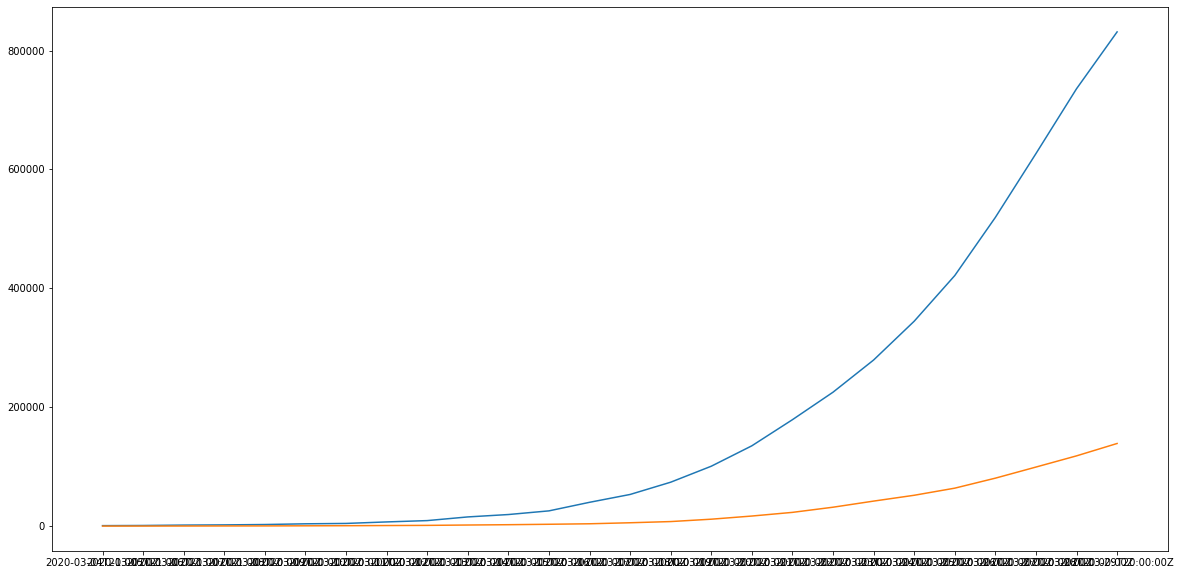

In [165]:
plt.figure(figsize=(20,10))
# print(list(df.dateChecked))
# date_l = list(df.dateChecked)[::-1]
plt.plot(list(df.dateChecked)[::-1], list(df.totalTestResults)[::-1])
plt.plot(list(df.dateChecked)[::-1], list(df.positive)[::-1])


In [239]:
USA_df = df[['totalTestResults', 'positive']]

In [240]:
USA_df = USA_df[::-1]

In [241]:
USA_df = USA_df.reset_index()

In [242]:
USA_df
USA_df.drop(columns=['index'], inplace =True)

In [243]:
USA_df

,totalTestResults,positive
0,866,118
1,1129,176
2,1794,223
3,2150,341
4,2752,417
5,3951,584
6,4585,778
7,7123,1053
8,9356,1315
9,15535,1922


In [203]:
USA_POP = 328953020
USA_df_r = USA_df
USA_df_r['totalTestResults'] = 1000*USA_df['totalTestResults']/USA_POP
USA_df_r['positive'] = 1000*USA_df['positive']/USA_POP
USA_df_r

,totalTestResults,positive
0,0.002633,0.000359
1,0.003432,0.000535
2,0.005454,0.000678
3,0.006536,0.001037
4,0.008366,0.001268
5,0.012011,0.001775
6,0.013938,0.002365
7,0.021654,0.003201
8,0.028442,0.003998
9,0.047226,0.005843


In [210]:
USA_df_r = USA_df_r[['positive', 'totalTestResults']]
USA_df_r

,positive,totalTestResults
0,0.000359,0.002633
1,0.000535,0.003432
2,0.000678,0.005454
3,0.001037,0.006536
4,0.001268,0.008366
5,0.001775,0.012011
6,0.002365,0.013938
7,0.003201,0.021654
8,0.003998,0.028442
9,0.005843,0.047226


In [205]:
S_KOR_df_r = S_KOR_df_r.rename(columns={"n_test": "positive", "n_confirmed": "totalTestResults"})

In [216]:
S_KOR_df_r = S_KOR_df_r.rename(columns={"positive": "S_KOR_COVID_Confirmed", "totalTestResults": "S_KOR_COVID_Total_Tests"})

In [217]:
USA_df_r = USA_df_r.rename(columns={"positive": "USA_COVID_Confirmed", "totalTestResults": "USA_COVID_Total_Tests"})

Text(0.5, 0, 'Number of dates after 100 COVID cases confirmed')

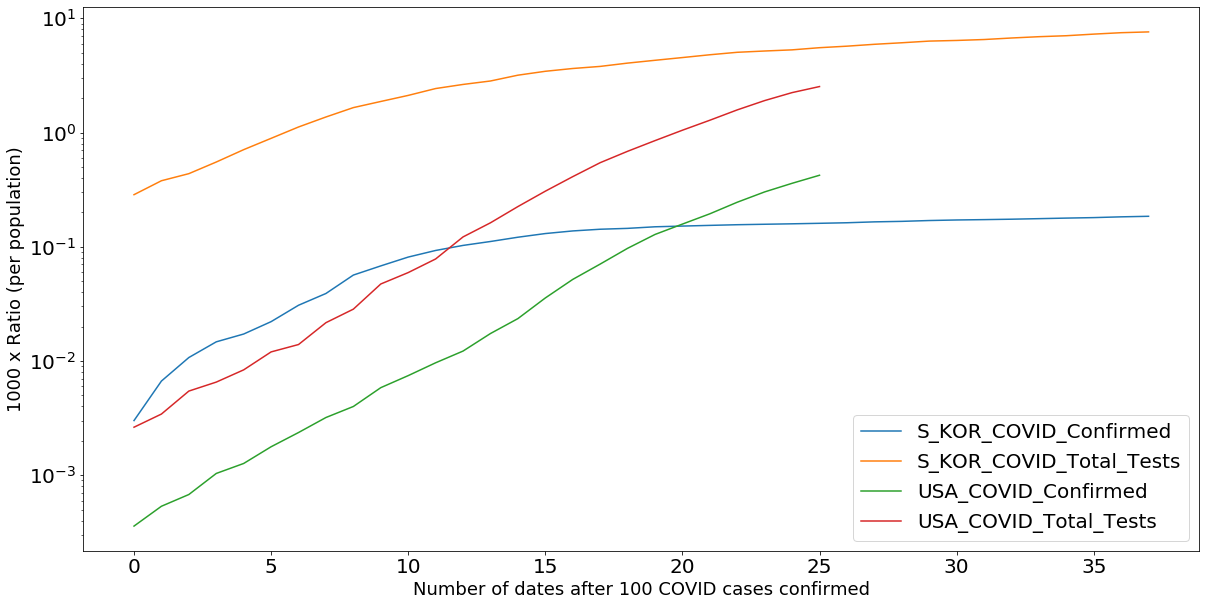

In [235]:
ax = S_KOR_df_r.plot(figsize=(20,10), logy=True)
USA_df_r.plot(ax=ax)
ax.legend(fontsize=20)
ax.tick_params(axis='both', labelsize=20)
ax.set_ylabel("1000 x Ratio (per population)",fontsize=18)
ax.set_xlabel("Number of dates after 100 COVID cases confirmed",fontsize=18)

Text(0.5, 0, 'Number of dates after 100 COVID cases confirmed')

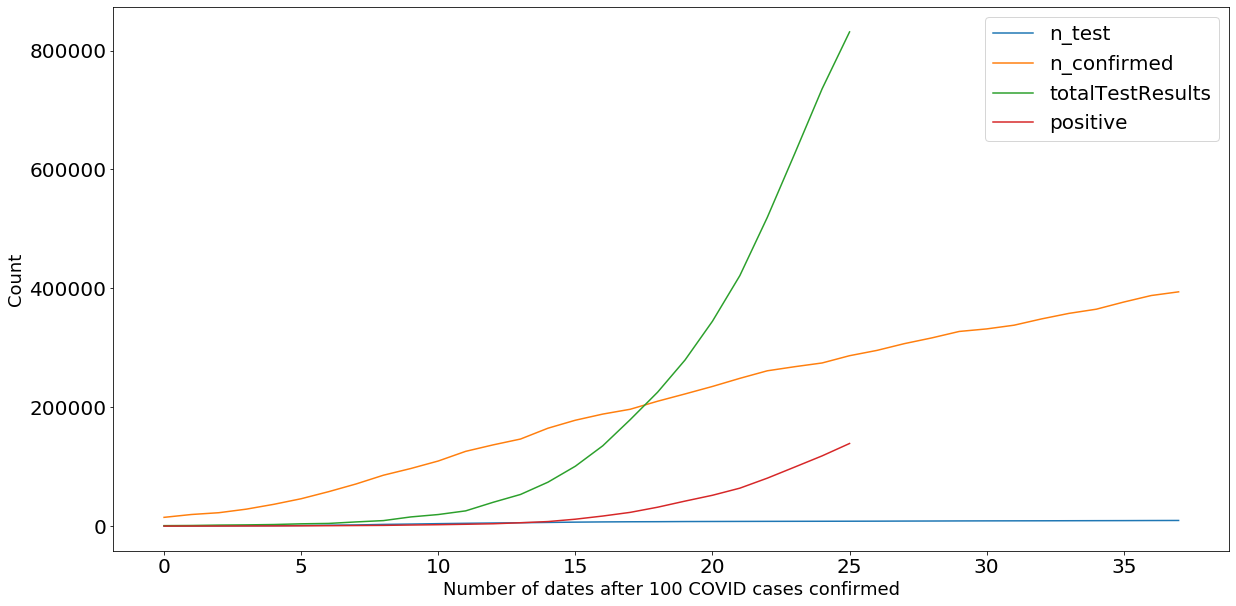

In [245]:
ax = S_KOR_df.plot(figsize=(20,10), logy=False)
USA_df.plot(ax=ax)
ax.legend(fontsize=20)
ax.tick_params(axis='both', labelsize=20)
ax.set_ylabel("Count",fontsize=18)
ax.set_xlabel("Number of dates after 100 COVID cases confirmed",fontsize=18)